In [9]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

In [10]:
image_data = nib.load('../../images/1/FLAIR.nii.gz').get_fdata()

In [23]:
# Median Filter with noise detection using finite differences (Edge filter)
def edge_filter(image, threshold=0.1):
    filtered_image = np.zeros_like(image)

    for x in range(1, image.shape[0] - 2):
        for y in range(1, image.shape[1] - 2):
            for z in range(1, image.shape[2] - 2):
                # Compute the derivatives in x, y, and z directions
                dx = image[x + 1, y, z] - image[x - 1, y, z]
                dy = image[x, y + 1, z] - image[x, y - 1, z]
                dz = image[x, y, z + 1] - image[x, y, z - 1]

                # Compute the magnitude of the gradient
                magnitude = np.sqrt(dx * dx + dy * dy + dz * dz)

                # Separate pixels based on the current threshold
                below_threshold = magnitude[magnitude < threshold]
                above_threshold = magnitude[magnitude >= threshold]

                # Calculate the new threshold as the average of below_threshold and above_threshold
                threshold = (np.mean(below_threshold) + np.mean(above_threshold)) / 2   


                # If the magnitude is below the threshold, apply median filter
                if magnitude < threshold:
                    neighbours = []
                    for dx in range(-1, 2):
                        for dy in range(-1, 2):
                            for dz in range(-1, 2):
                                neighbours.append(image[x + dx, y + dy, z + dz])
                    median = np.median(neighbours)
                    filtered_image[x, y, z] = median
                else:
                    filtered_image[x, y, z] = image[x, y, z]
    return filtered_image

filtered_image = edge_filter(image_data, 1)

KeyboardInterrupt: 

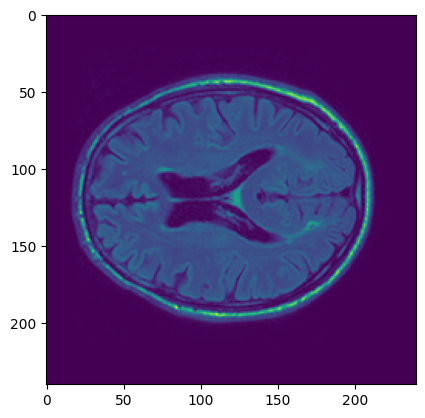

In [20]:
plt.imshow(filtered_image[:, :, 24])
# plt.imshow(filtered_image_data[:, :, 24]-image_data[:, :, 24])

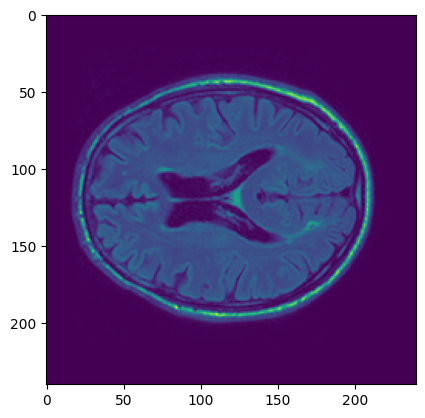

In [21]:
plt.imshow(image_data[:, :, 24])